# Polynomial regression

This notebook is practice and experiments with polynomial regression

## Linear regression with x^2 and x^3 features

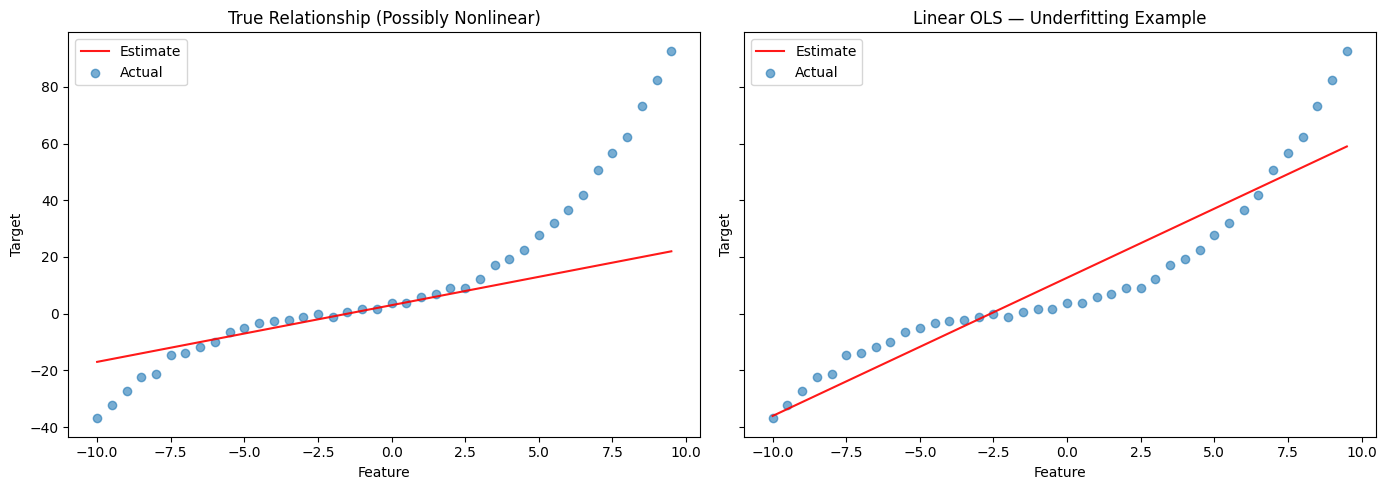

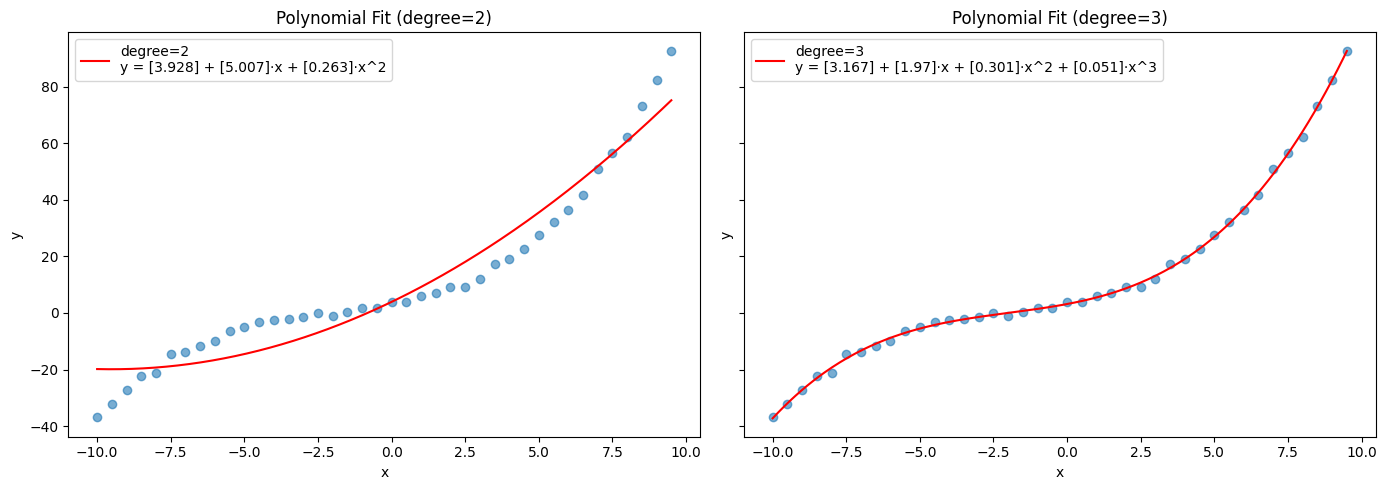

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mlpeople.optimization.experiments import run_linear_underfit_experiment
from mlpeople.models.linear import plot_polynomial_fit_1d

# Create a slightly nonlinear relationship:
# linear trend + small quadratic and cubic terms to introduce curvature
# ys = 2*xs + 3 + 0.3*(xs^2) + 0.05*(xs^3)
xs, ys_noisy, beta_ols = run_linear_underfit_experiment(
    w_true=2,
    b_true=3,
    ys_non_linearity_fn=lambda x:  0.3*(x**2) + 0.05*(x**3)
)

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

# adds x^2 as second feature, fit ols, predicts and plot fit line
beta_2 = plot_polynomial_fit_1d(xs, ys_noisy, degree=2, ax=axes[0], show=False)

# adds x^2 and x^3 as features, fit ols, predicts and plot fit line
beta_3 = plot_polynomial_fit_1d(xs, ys_noisy, degree=3, ax=axes[1], show=False)

plt.tight_layout()
plt.show()

## Add sinus component to linear
Add sinus component to linear and try to fit with polynomial features experiment

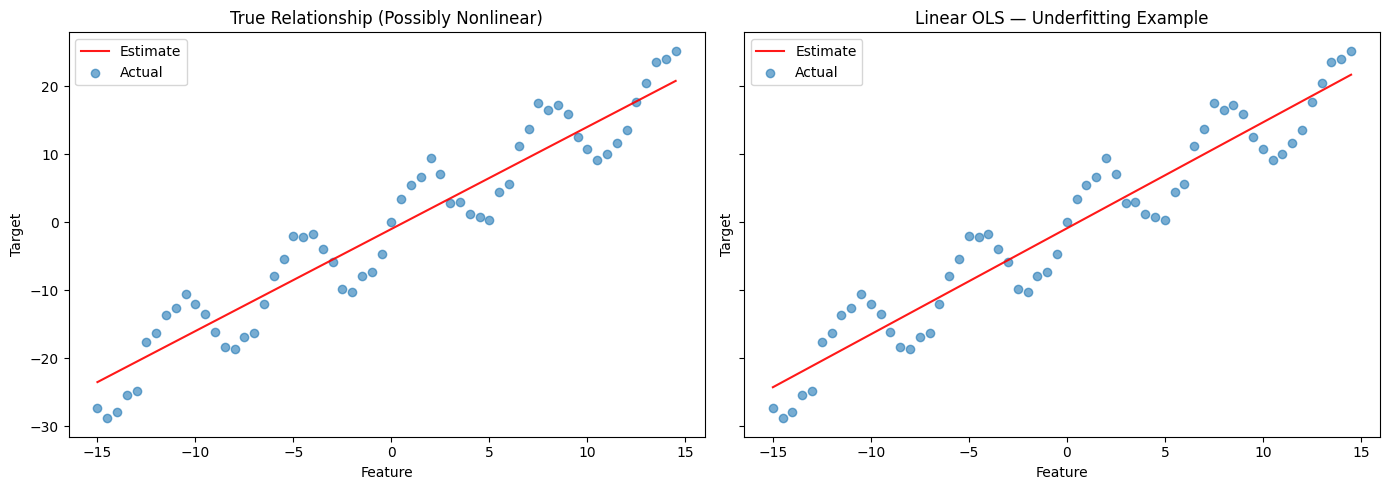

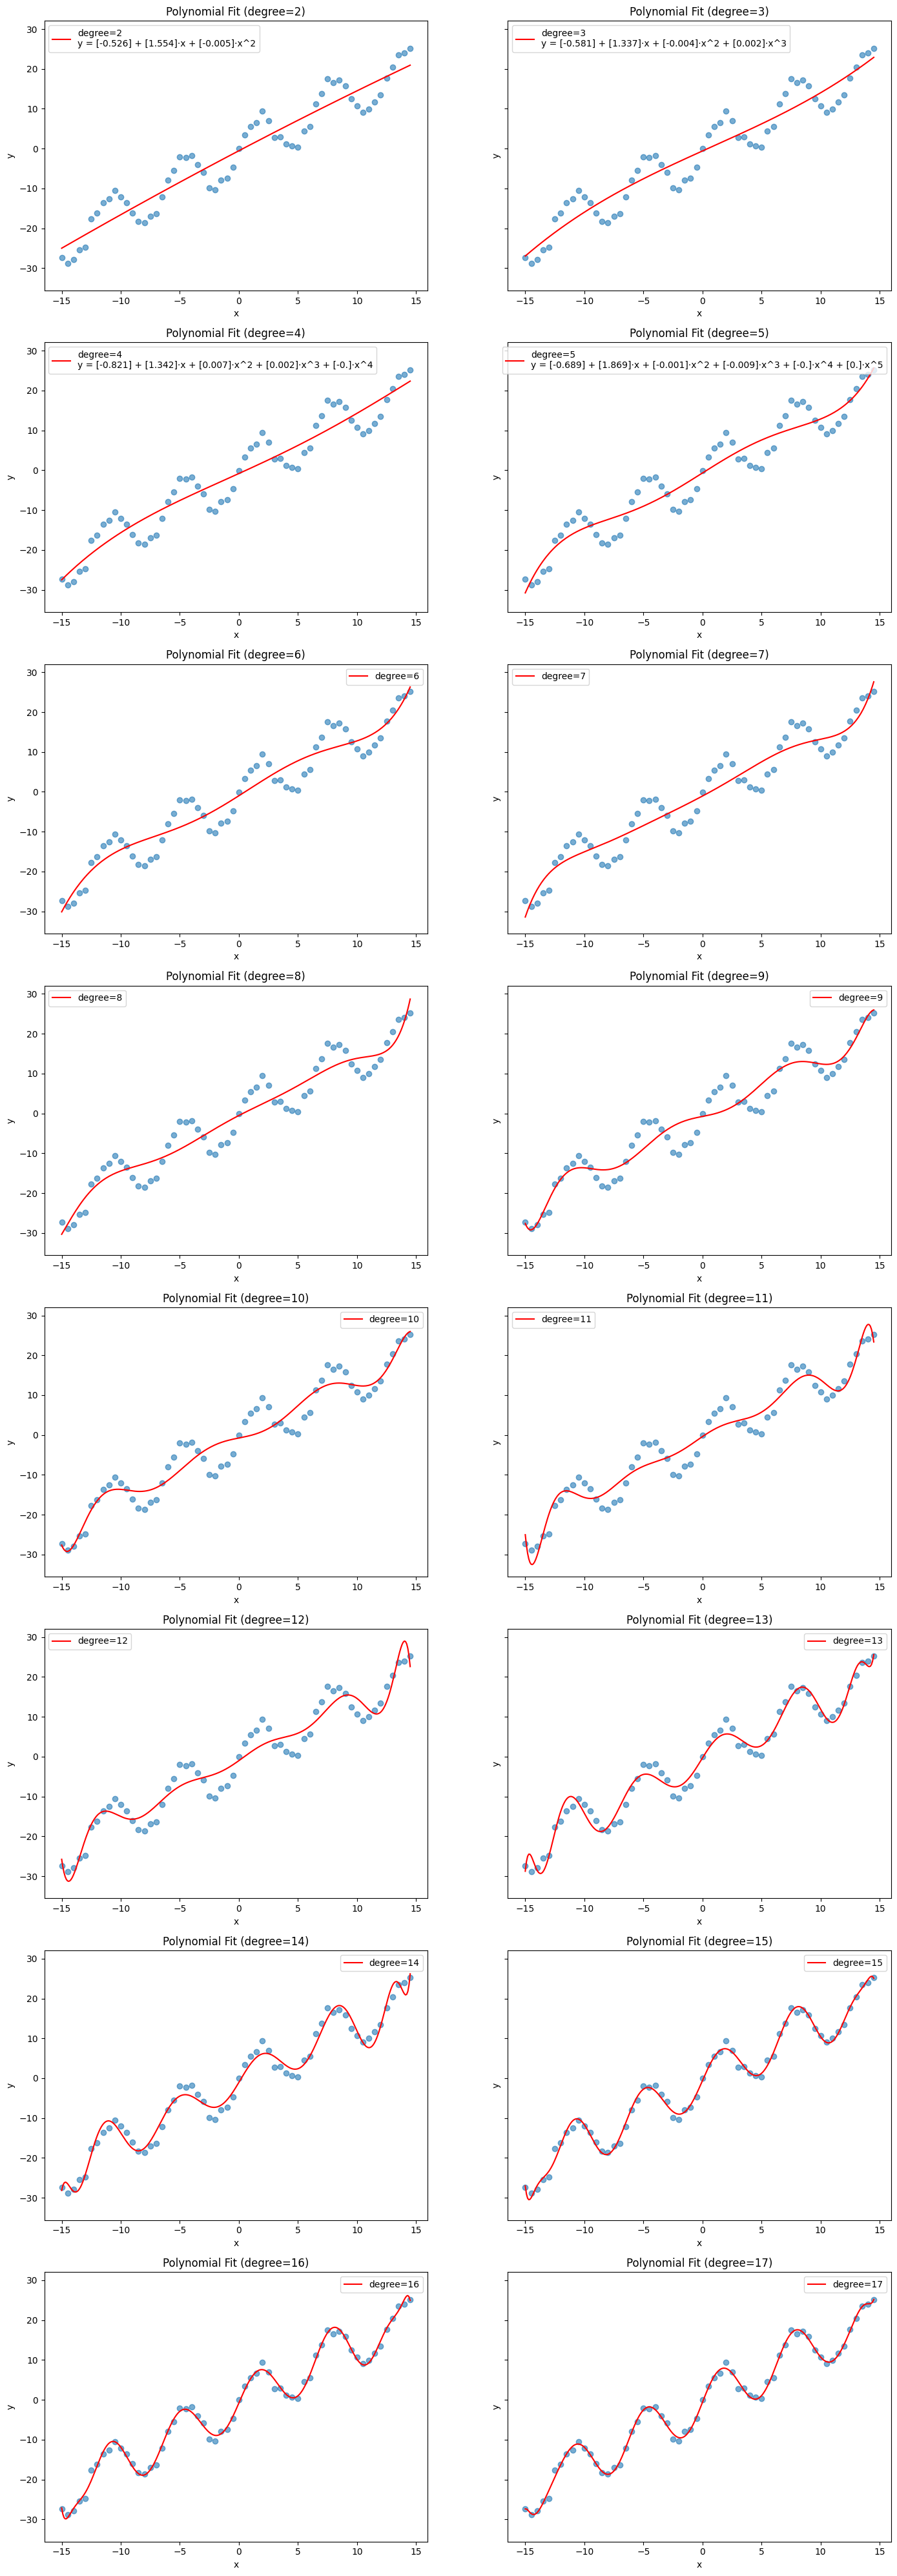

In [ ]:
# Create a slightly nonlinear relationship:
# linear trend + sinus terms to introduce curvature
# ys = 1.5*xs - 1 + 6*sin(xs)
xs, ys_noisy, beta_ols = run_linear_underfit_experiment(
    w_true=1.5,
    b_true=-1,
    xs_range=np.arange(-15, 15, 0.5),
    ys_non_linearity_fn=lambda xs: 6*np.sin(xs)
)

# test degrees up to 17 and show plots
degrees = range(2, 18)

fig, axes = plt.subplots(8, 2, figsize=(14,40), sharey=True)
axes = axes.flatten()

for ax, degree in zip(axes, degrees):
    last_beta = plot_polynomial_fit_1d(
        xs, ys_noisy, degree=degree, ax=ax, show=False,
        show_beta=(False if degree > 5 else True)
    )

plt.tight_layout()
plt.show()

## Combine Sin square and cubic

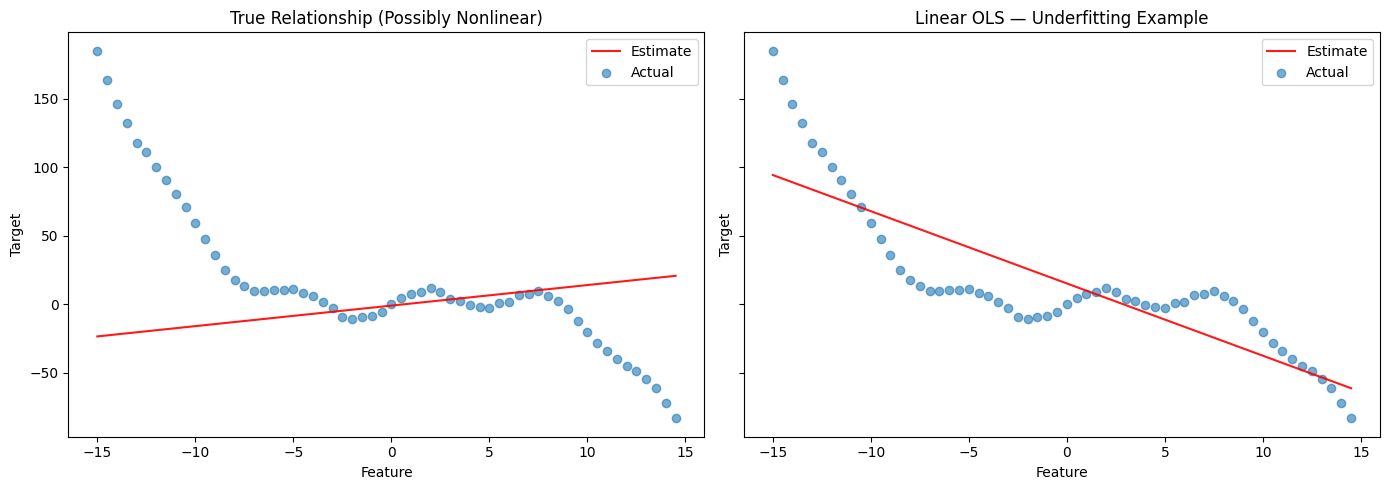

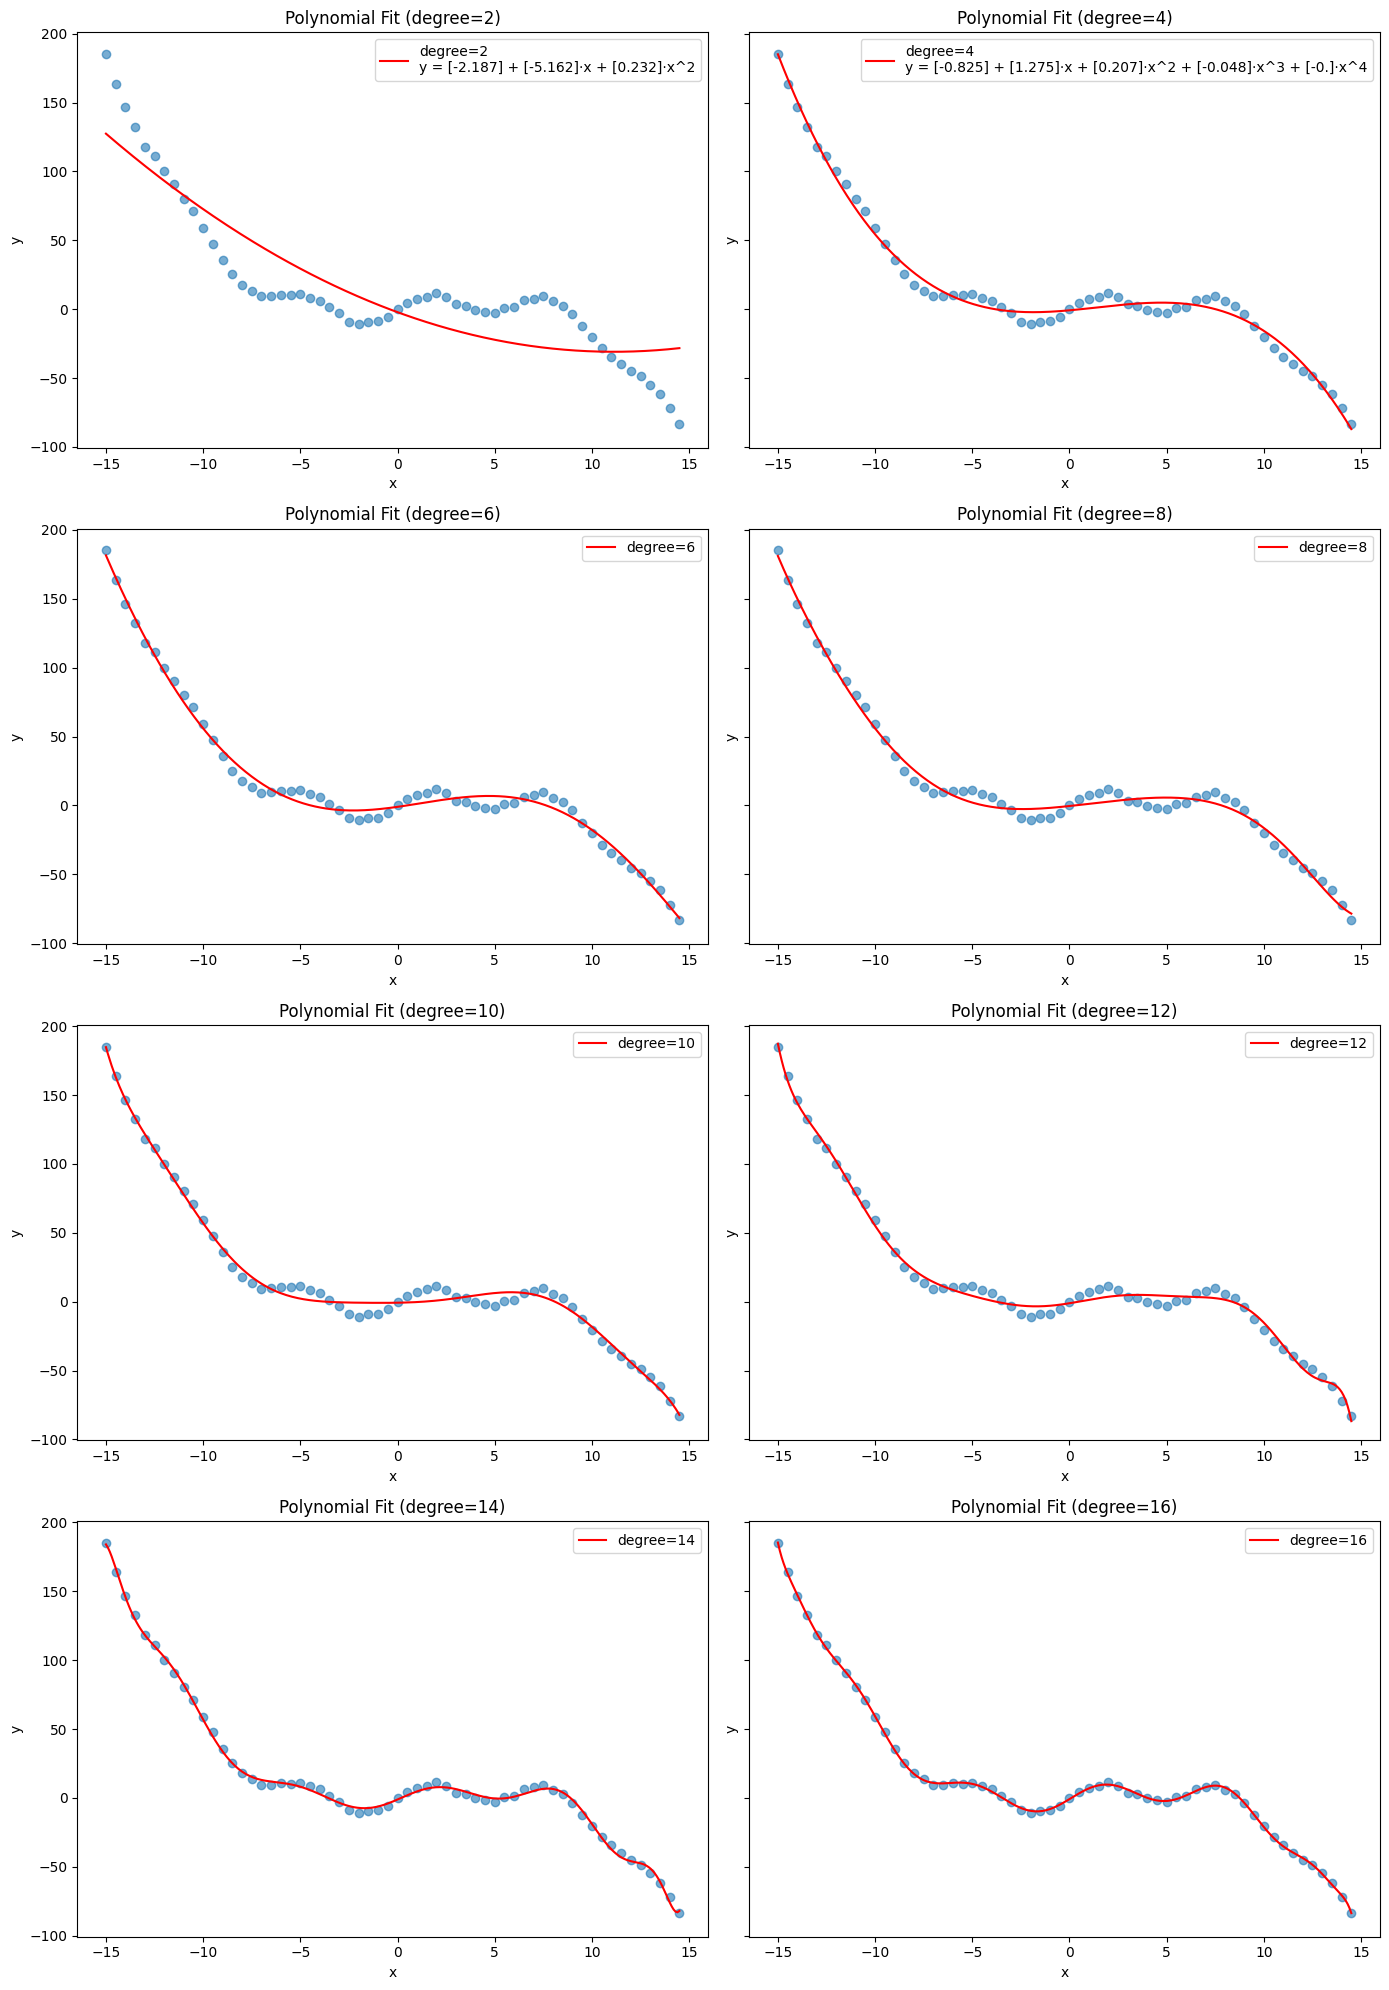

In [4]:
# ys = 1.5*xs - 1 + 6*sin(xs)
xs, ys_noisy, beta_ols = run_linear_underfit_experiment(
    w_true=1.5,
    b_true=-1,
    xs_range=np.arange(-15, 15, 0.5),
    ys_non_linearity_fn=lambda xs: 0.2*xs**2 - 0.05*xs**3 + 8*np.sin(xs)
)

degrees = range(2, 18, 2)

fig, axes = plt.subplots(4, 2, figsize=(14,20), sharey=True)
axes = axes.flatten()

for ax, degree in zip(axes, degrees):
    last_beta = plot_polynomial_fit_1d(
        xs, ys_noisy, degree=degree, ax=ax, show=False,
        show_beta=(False if degree > 5 else True)
    )

plt.tight_layout()
plt.show()

In [1]:
# TOdo